<a href="https://colab.research.google.com/github/Catarina-MCs2223/tese2/blob/main/Compara%C3%A7%C3%A3o_de_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('km_mean2.csv', delimiter=';')
df

In [ ]:
db=pd.read_csv('h27_day.csv', delimiter=',')
media=db.mean()
desvio=db.std()
cv=desvio/media
cv

In [ ]:
db=pd.read_csv('cv 2.csv',delimiter=';')

#DBSCAN

<ipython-input-62-4b14bbd4fe0a>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(db['CV'], db['Mean'],  c=db['Color'], cmap='viridis')


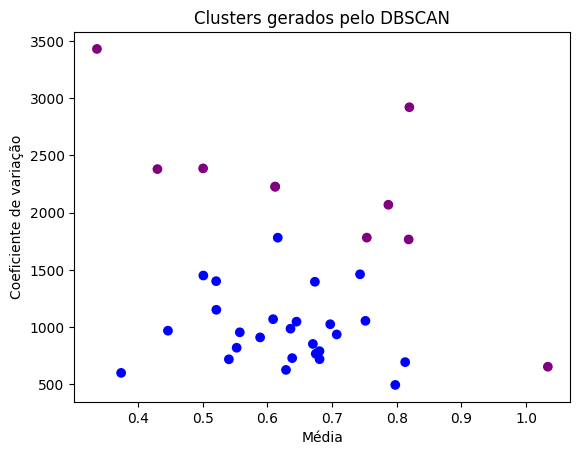

In [ ]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import DBSCAN
'''labels = DBSCAN(eps=3, min_samples=2).fit_predict(df)

db_index1 = calinski_harabasz_score(df, kmeans1.labels_)
print(f"Calinski-Harabasz Index for 2 clusters: {db_index1}")

'''

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(db)

# Aplique o DBSCAN aos dados
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(scaled_data)

# Obtenha os rótulos de cluster atribuídos
labels = dbscan.labels_

# Adicione os rótulos de cluster de volta ao DataFrame
db['Cluster'] = labels
colors = ['blue', 'green', 'red', '0.6']
db['Color'] = [colors[label] if label != -1 else 'purple' for label in labels]

# Visualize os clusters usando um gráfico de dispersão
plt.scatter(db['CV'], db['Mean'],  c=db['Color'], cmap='viridis')
plt.title("Clusters gerados pelo DBSCAN")
plt.xlabel("Média")
plt.ylabel("Coeficiente de variação")
plt.show()

#Calinski Harabasz Score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

kmeans1 = KMeans(n_clusters=2, random_state=30)
labels = kmeans1.fit_predict(df)
db_index1 = calinski_harabasz_score(df, kmeans1.labels_)
print(f"Calinski-Harabasz Index for 2 clusters: {db_index1}")

kmeans2 = KMeans(n_clusters=3, random_state=30)
labels = kmeans2.fit_predict(df)
db_index2 = calinski_harabasz_score(df, kmeans2.labels_)
print(f"Calinski-Harabasz Index for 3 clusters: {db_index2}")

kmeans3 = KMeans(n_clusters=4, random_state=30)
labels = kmeans3.fit_predict(df)
db_index3 = calinski_harabasz_score(df, kmeans3.labels_)
print(f"Calinski-Harabasz Index for 2 clusters: {db_index3}")

Calinski-Harabasz Index for 2 clusters: 93.33087606189571
Calinski-Harabasz Index for 3 clusters: 99.57735229399353
Calinski-Harabasz Index for 2 clusters: 154.1242069928551


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 2, Índice "Calinski-Harabasz" : 93.33087606189571
Clusters: 3, Índice "Calinski-Harabasz" : 99.57735229399353
Clusters: 4, Índice "Calinski-Harabasz" : 154.1242069928551
Clusters: 5, Índice "Calinski-Harabasz" : 248.67038692861317


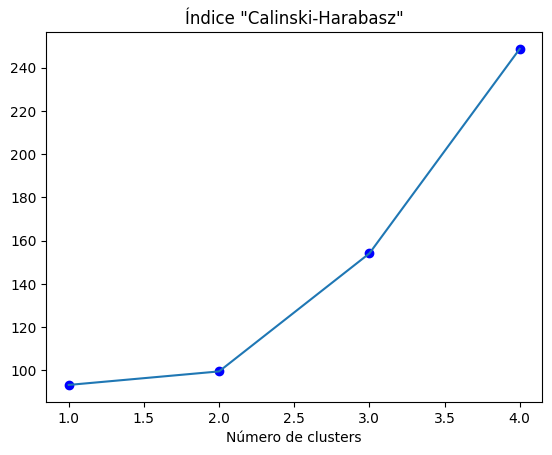

In [ ]:
import matplotlib.pyplot as plt

results = {}

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(df)
    db_index = calinski_harabasz_score(df, kmeans.labels_)
    results.update({i: db_index})

# Imprime os valores por pontos
for num_clusters, db_index in results.items():
    print(f'Clusters: {num_clusters}, Índice "Calinski-Harabasz" : {db_index}')

plt.plot(range(1,5), list(results.values()))
plt.scatter(range(1,5), list(results.values()), color='blue', marker='o')
plt.xlabel("Número de clusters")
plt.title('Índice "Calinski-Harabasz"')
plt.show()

# Davies Bouldin Score


In [ ]:
from sklearn.metrics import davies_bouldin_score

kmeans1 = KMeans(n_clusters=2, random_state=30)
labels = kmeans1.fit_predict(df)
db_index1 = davies_bouldin_score(df, kmeans1.labels_)
print(f"Calinski-Harabasz Index for 2 clusters: {db_index1}")

kmeans2 = KMeans(n_clusters=3, random_state=30)
labels = kmeans2.fit_predict(df)
db_index2 = davies_bouldin_score(df, kmeans2.labels_)
print(f"Calinski-Harabasz Index for 3 clusters: {db_index2}")

kmeans3 = KMeans(n_clusters=4, random_state=30)
labels = kmeans3.fit_predict(df)
db_index3 = davies_bouldin_score(df, kmeans3.labels_)
print(f"Calinski-Harabasz Index for 2 clusters: {db_index3}")

Calinski-Harabasz Index for 2 clusters: 0.4267664324422184
Calinski-Harabasz Index for 3 clusters: 0.5255950057821527
Calinski-Harabasz Index for 2 clusters: 0.3439710253045506


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 2, Índice "Davies Bouldin": 0.4267664324422184
Clusters: 3, Índice "Davies Bouldin": 0.5255950057821527
Clusters: 4, Índice "Davies Bouldin": 0.3439710253045506
Clusters: 5, Índice "Davies Bouldin": 0.366816599664103


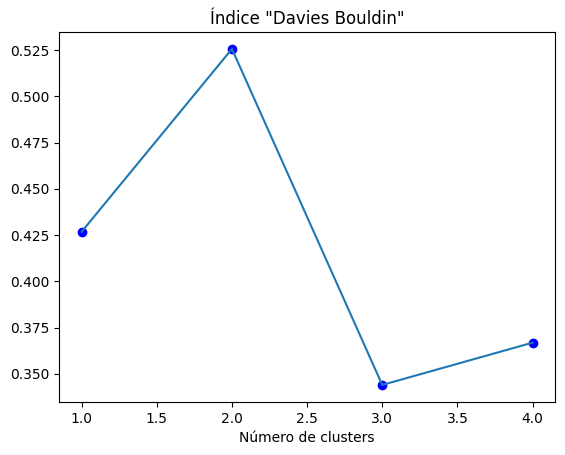

In [ ]:
import matplotlib.pyplot as plt

results = {}

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(df)
    db_index = davies_bouldin_score(df, kmeans.labels_)
    results.update({i: db_index})

# Imprime os valores por pontos
for num_clusters, db_index in results.items():
    print(f'Clusters: {num_clusters}, Índice "Davies Bouldin": {db_index}')

plt.plot(range(1,5), list(results.values()))
plt.scatter(range(1,5), list(results.values()), color='blue', marker='o')
plt.xlabel("Número de clusters")
plt.title('Índice "Davies Bouldin"')
plt.show()

# Hierarchical clustering

In [ ]:
data=list(zip(df['House'], df['Mean ']))
print(data)

[(2, 626.52378), (4, 2380.616855), (5, 936.060871), (7, 1461.633553), (8, 719.141967), (9, 694.379999), (10, 720.144299), (11, 767.590536), (13, 790.295717), (14, 2227.123293), (15, 2227.123293), (16, 3430.308875), (17, 495.240955), (18, 910.379591), (19, 1781.814773), (20, 986.536634), (21, 1069.570294), (22, 729.487516), (23, 1401.634403), (25, 853.255551), (26, 1450.992264), (27, 654.165831), (28, 1766.084871), (29, 1396.349087), (31, 1781.452024), (32, 1047.841072), (33, 1055.098803), (34, 2386.658649), (35, 1151.480399), (36, 954.937314), (37, 1025.46099), (39, 968.931499), (40, 2069.096247), (41, 819.9862), (42, 600.304997)]


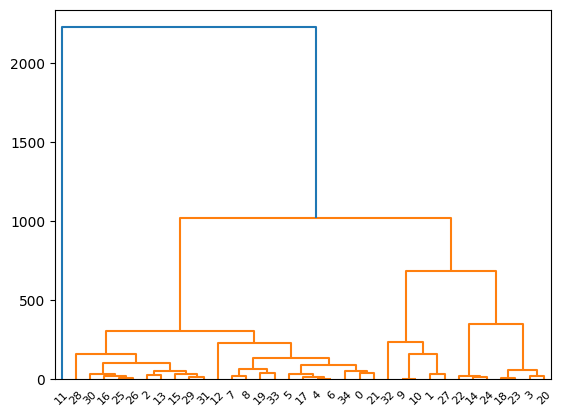

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
linkage_data = linkage(data, method='average', metric='euclidean')
dendrogram(linkage_data)
#plt.axvline(x=3,color='b',ls='-')
plt.show()